### Toy example: predicting a variable with another variable

*Author: Jiayi Zhang* (jz6521@princeton.edu)

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [44]:
# import toy dataset
data_fp = "data/toy_example.csv"
df = pd.read_csv(data_fp)
x = df["x"]
y = df["y"]

<Axes: xlabel='x', ylabel='y'>

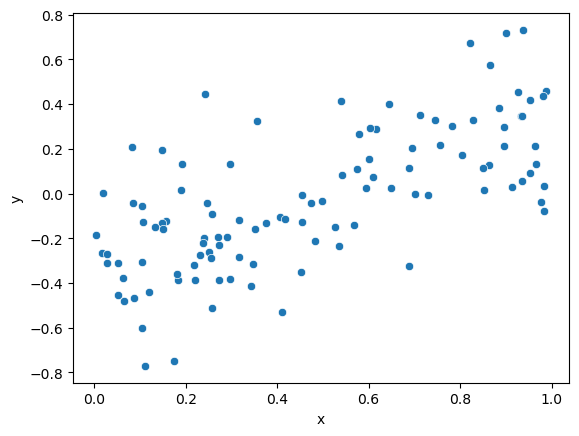

In [45]:
sns.scatterplot(data=df, x="x", y="y")

We want to predict the value of $y$ given the value of $x$. In other words, we want to find some function $f$ such that $f(x) \sim y$.

This class of problem is called *regression*. It is very well studied (in many desciplines, outside of neuroscience). Here we consider $f$ to be some polynomials.

In [46]:
# for storing values
degs = []
residues = []

In [59]:
# fit a polynomial of degree deg
# read full spec of np.polyfit for more info
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
deg = 4
coefs, res, rank, sgv, rcond = np.polyfit(x, y, deg, full=True)

# record fitted poly degree and residues
degs.append(deg)
residues.append(res)


In [60]:
# helper: given f() and x, return f(x)
def eval_poly(coefs, x):
    return [np.polyval(coefs, i) for i in x]

In [61]:
# predict y with the fitted polynomial
x_hat = np.linspace(0, 1, 100)
y_hat = eval_poly(coefs, x_hat)

# create new df
new_df = {"x_hat": x_hat, "y_hat": y_hat}

Text(0.5, 1.0, 'Fitting a polynormial of degree 4')

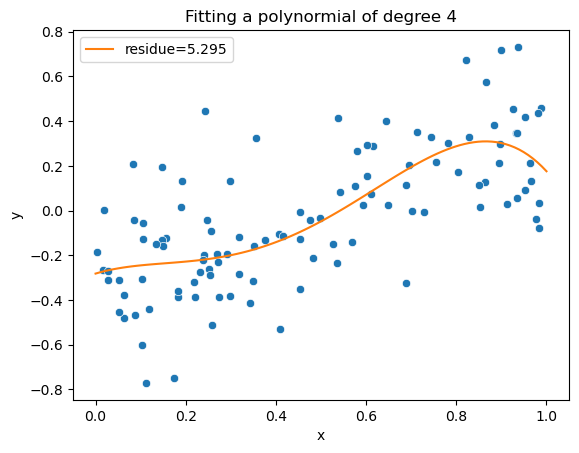

In [62]:
# visualize our outcomes
# scatter plot our data
sns.scatterplot(data=df, x="x", y="y")
sns.lineplot(data=new_df, x="x_hat", y="y_hat", c="tab:orange",
             label="residue=%.3f"%res)
plt.title(f"Fitting a polynormial of degree {deg}")

Wait a minute! What happens when we fit polynomials of higher degrees?

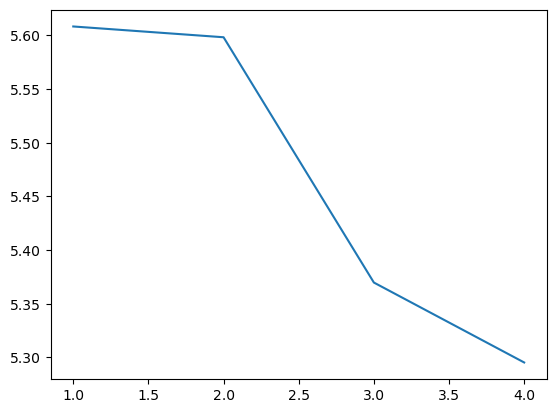

In [63]:
plt.plot(degs, residues)

Text(0, 0.5, 'RSS')

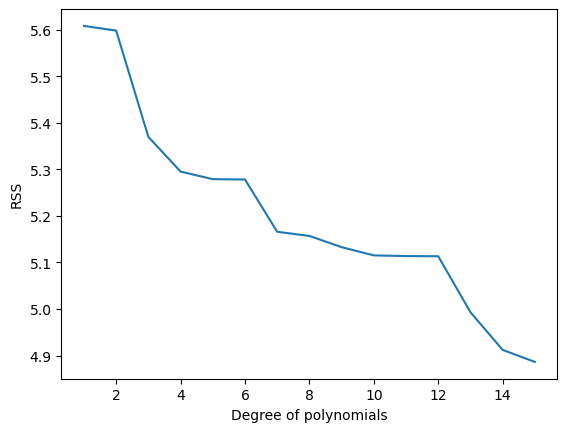

In [64]:
# for storing values
degs = range(1, 16)
residues = []

for deg in degs:  
    _, res, _, _, _ = np.polyfit(x, y, deg, full=True)
    residues.append(res)

plt.plot(degs, residues)
plt.xlabel("Degree of polynomials")
plt.ylabel("RSS")

Testing/validating our models

First, split our data into 2 sets: a training and a testing set. We want 2 mutually exclusive sets so that the information from 1 set doesn't "contaminate" the testing procedure.

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
test_ratio = 0.3 # how do we pick this number
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_ratio)

We can incorporate the routine above.

In [67]:
def rss(y, y_hat):
    return np.sum(np.square(y-y_hat))

# coefs, np_res, rank, sgv, rcond = np.polyfit(x, y, deg, full=True)
# our_res = rss(y, eval_poly(coefs, x))

[4.88624674] 4.886246703061454


In [70]:
degs = range(1, 16)
residues = []

rep = 20 # number of replicates

seeds = np.random.randint(size=rep)

for deg in degs:
    for r in range(rep): # replications
        # split train and test data
        x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                            test_size=test_ratio, random_state=r)
        # find optimal model with training set
        coefs, train_res, _,_,_ = np.polyfit(x_train, y_train, deg, full=True)
        train_res = train_res[0]
        # test how generalizable is our model
        test_res = rss(y_test, eval_poly(coefs, x_test))
        residues.append([deg, train_res, test_res])

df = pd.DataFrame(data=residues, columns=["degree", "train", "test"])

Text(0.5, 0, 'Degree of polynomial')

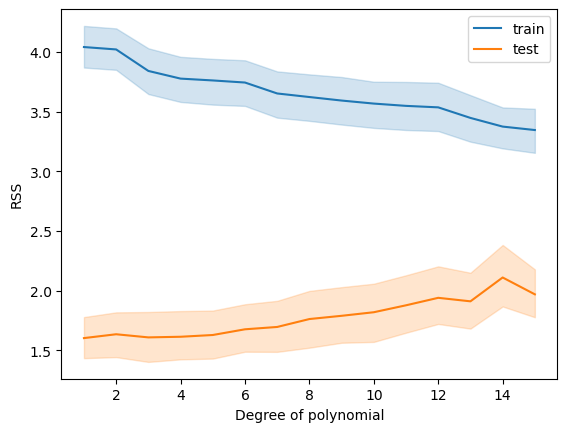

In [71]:
# plot rss in train and test sets
sns.lineplot(data=df, x="degree", y="train", label="train")
sns.lineplot(data=df, x="degree", y="test", label="test")

# note the RSS for train and test are very different because of the difference in the size of the train and test sets!
plt.ylabel("RSS")
plt.xlabel("Degree of polynomial")

Ha! Even though in the training set, RSS decreases with the incrase of model complexity. This is not true for the test set (indicative of overfitting).